## Early Diabetes Prediction with Machine Learning Classification algorithms - Logistic Regression, Decision Tree, & Random Forest

- This project aims to train Machine Learning classification models to predict whether a patient  is at risk of developing diabetes. 
- Key indicators (symptoms) correlated to diabetes will be identified.
- This project will be useful to clinicians, as it will help them understand how to better avoid missing the False Positive cases who may go undiagnosed.


#### Data Souce: 
- Collected data from UCI repository - https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

### PART 1: Data Collection & Cleaning

In [2]:
import pandas as pd

In [3]:
# read the CSV into a DataFrame
df= pd.read_csv ("C:\\Users\\chris\\OneDrive\\Desktop\\DATA STUFF\\PROJECTS\\Diabetes prediction - Uplevel\\diabetes_data_upload.csv")
df  

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
#replaceing valies in DataFrame with .replace

#columns with No/Yes
df =df.replace("No", 0)
df = df.replace("Yes", 1)
#class (Diabetes/ No diabetes)
df = df.replace("Negative", 0)
df = df.replace("Positive", 1)
#gender
df = df.replace("Male", 0)
df = df.replace("Female", 1)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [5]:
#check for missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
#check the dtypes to confirm the columns are all numerical (int and float) and there are no strings
df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [7]:
#remame the columns - have more consistent casing (all lowercase)
replace = {"Gender": "isfemale"}  # 0=male, 1 = female
df= df.rename(columns=replace)

In [8]:
#lowercase all columns
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'isfemale', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [9]:
#export DataFrame to CSV
df.to_csv("diabetes_data_clean.csv", index = None)

In [10]:
pd.read_csv("diabetes_data_clean.csv")

,age,isfemale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Summary of data collection and cleaning:
1. Collected data from UCI repository
2. Replaced strings to 1s and 0s
3. Lower-cased everything in columns
4. Exported the clean DataFrame to a new CSV


### PART 2: Analysis of data using Vizualization and Statistics

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import stats libraries
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot  #assess normality
from statsmodels.stats.weightstats import ztest  #perform stats test of difference between 2 different samples


In [12]:
#read CSV into a DataFrame
df =pd.read_csv("diabetes_data_clean.csv")
df

,age,isfemale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <BarContainer object of 10 artists>)

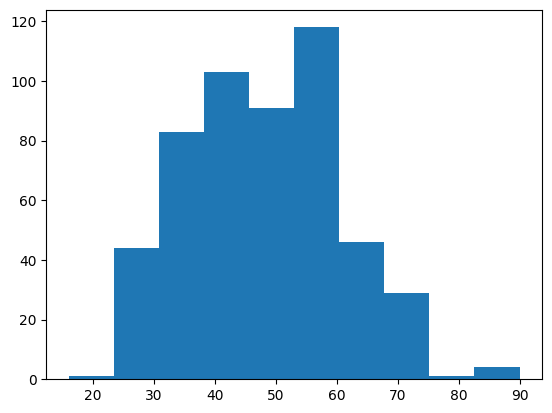

In [13]:
#examine age with a histogram
plt.hist(df['age'])  

The histogram takes the shape of a bellcurve, therefore can estimate the median age to be around 50, however will verify with more statistics below:

In [14]:
#mean age
df['age'].mean()

48.02884615384615

In [15]:
#median age
df['age'].median()

47.5

In [16]:
#viewing gender distribution
df['isfemale'].value_counts()

isfemale
0    328
1    192
Name: count, dtype: int64

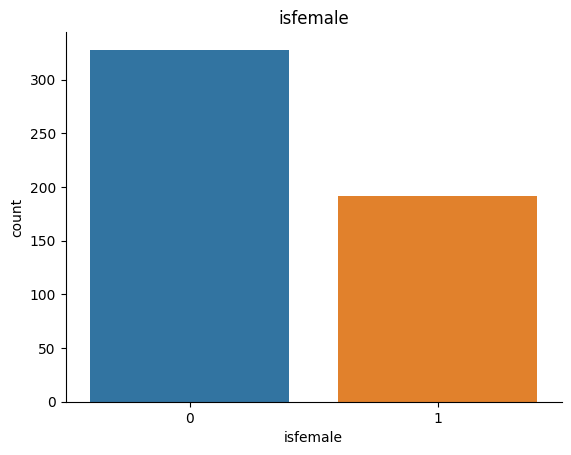

In [17]:
#Using count plot to view gender distribution
sns.countplot(x=df['isfemale']) 
plt.title('isfemale')
sns.despine()
plt.show()

In [18]:
# Create an object to view the distribution of other columns in the next steps
columns = df.columns [1:]
columns


Index(['isfemale', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness',
       'polyphagia', 'genital thrush', 'visual blurring', 'itching',
       'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

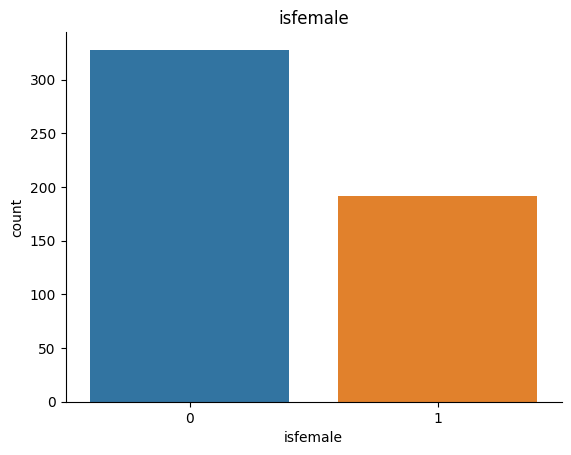

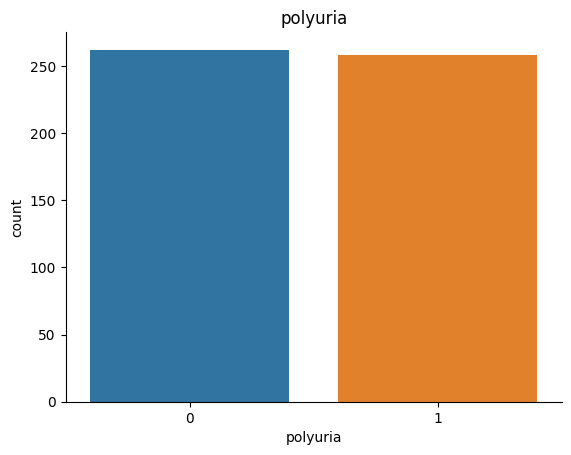

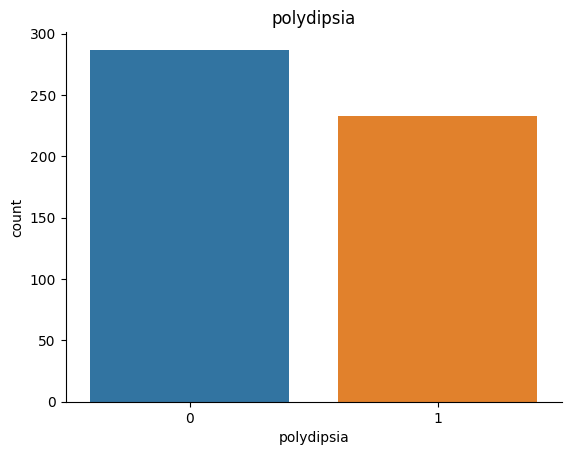

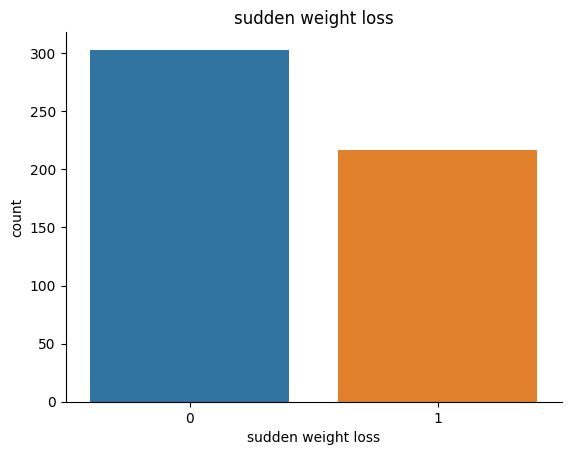

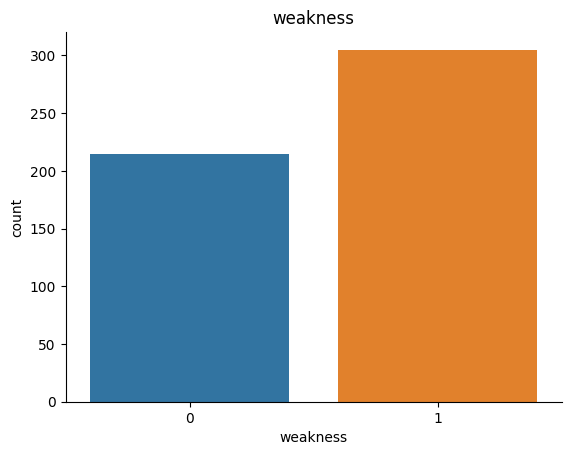

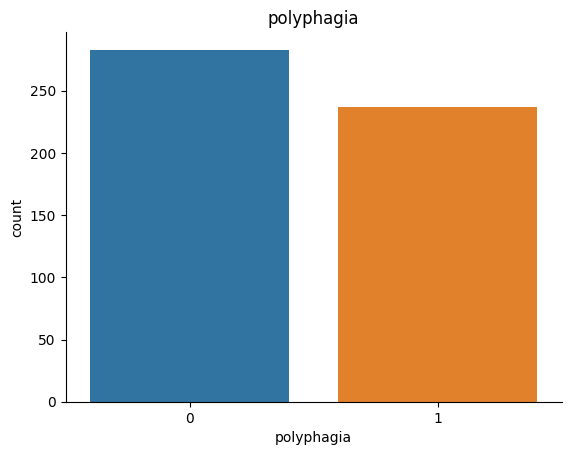

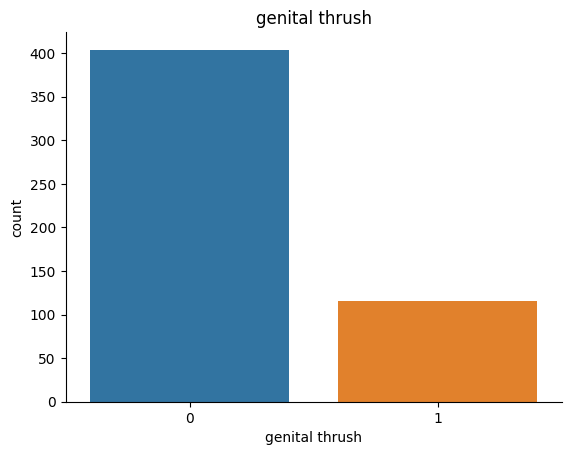

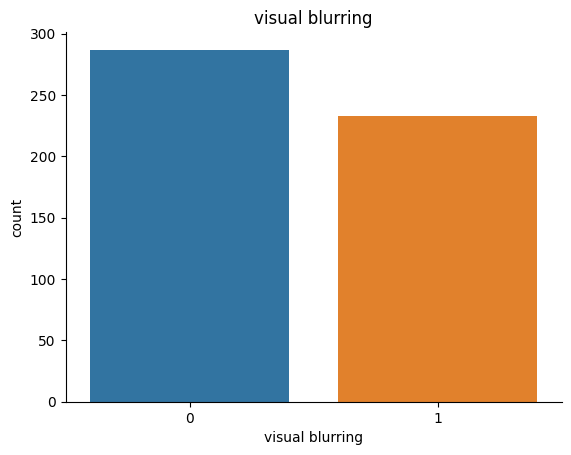

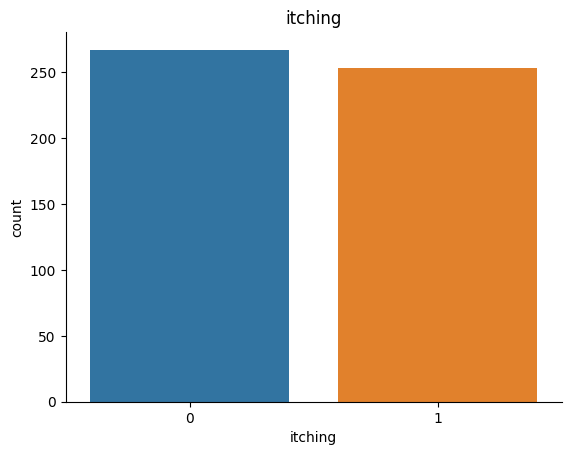

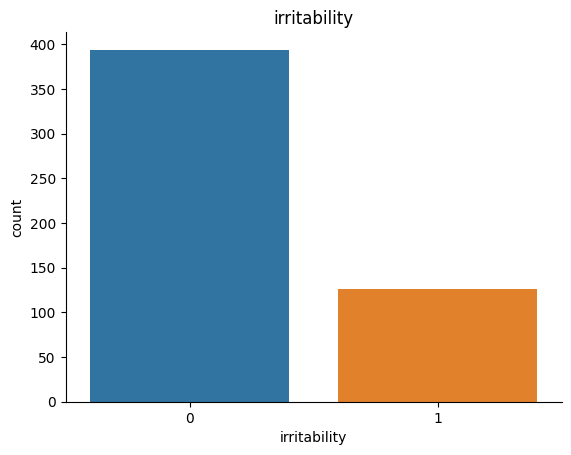

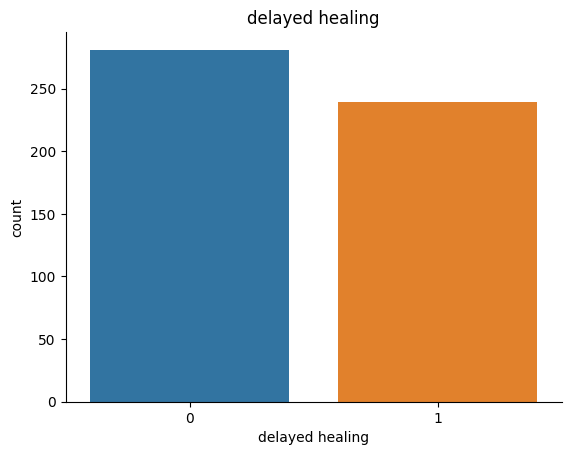

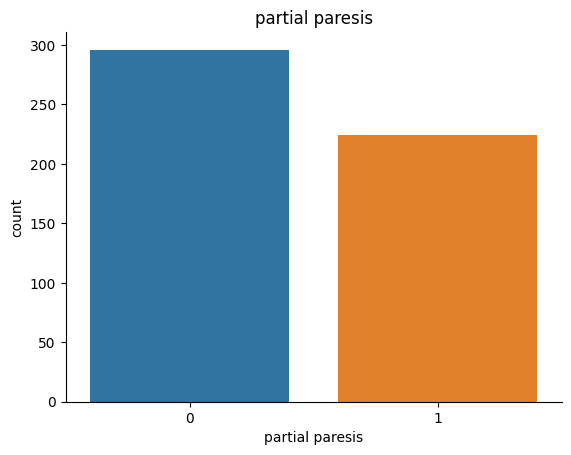

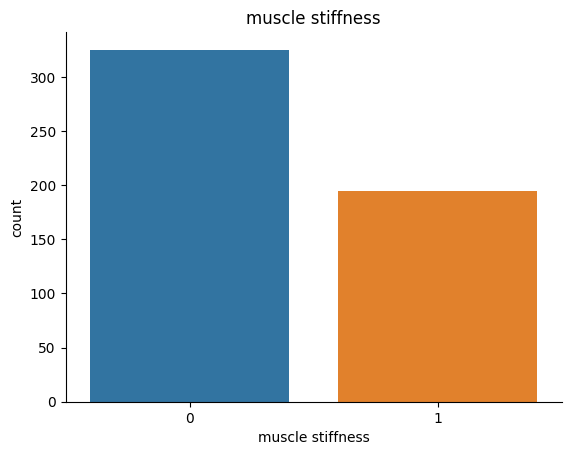

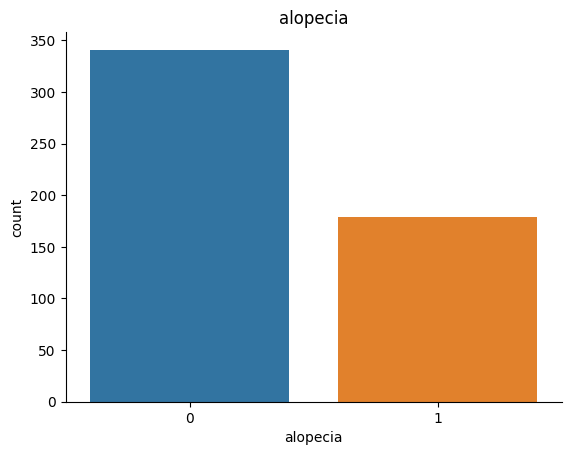

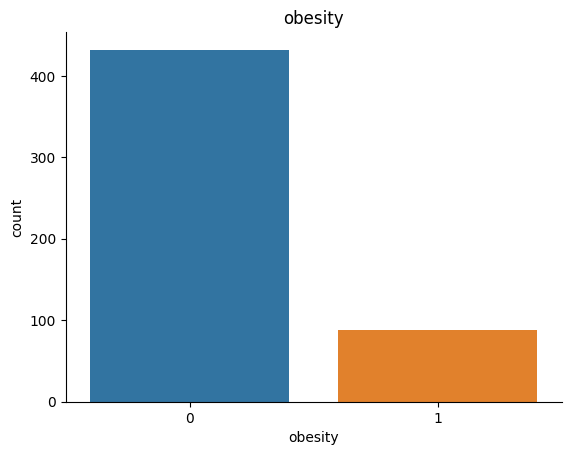

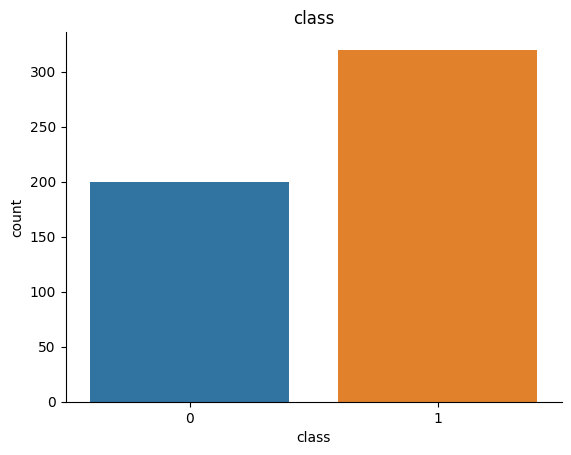

In [19]:
#Iterative countplot
for columns in columns:
    sns.countplot(x=df[columns])
    plt.title(columns)
    sns.despine()
    plt.show()
    

### Questions  to answer:
#### 1. Is obesity related to diabetes status? or is it independent


In [20]:
obesity_diabetes_crosstab = pd.crosstab(df['class'], df['obesity'])
obesity_diabetes_crosstab 


obesity,0,1
class,,
0,173,27
1,259,61


In [21]:
#chi2 test - test of independence
chi2_contingency(obesity_diabetes_crosstab)

Chi2ContingencyResult(statistic=2.3274739583333344, pvalue=0.12710799319896815, dof=1, expected_freq=array([[166.15384615,  33.84615385],
       [265.84615385,  54.15384615]]))

The P-Value of 0.127 shows there is no significant evidence that there is a relationship between obsesity status and diabetes. 
The expected freq array shows the values if everything was independent. Any deviation from the independent cross tab will be deemed dependent. 
Therefore array shown is similar to the chi2 cross tab numbers, and can say that obsesity and class are independent.

#### 2. Is gender related to diabetes status?

In [22]:
gender_diabetes_crosstab = pd.crosstab(df['class'], df['isfemale'])
gender_diabetes_crosstab 


isfemale,0,1
class,,
0,181,19
1,147,173


In [23]:
chi2_contingency(gender_diabetes_crosstab)

Chi2ContingencyResult(statistic=103.03685927972558, pvalue=3.289703730553317e-24, dof=1, expected_freq=array([[126.15384615,  73.84615385],
       [201.84615385, 118.15384615]]))

The p-value is 3.29e-24, meaning that there is significant evidence that there is a relationship between a postitive diabetes status and gender. 
The Independent array values are significantly differnt from the cross tab values therefore shows that obsesity status and gender are dependednt (there is a relationship)
There is significantly more females with diabetes compared to those without diabestes. (173)
There is significantly more males with out diabetes (181) than those with diabetes.

#### 3. Is polyuria related to obesity status?

In [24]:
polyuria_diabetes_crosstab = pd.crosstab(df['class'], df['polyuria'])
polyuria_diabetes_crosstab

polyuria,0,1
class,,
0,185,15
1,77,243


In [25]:
chi2_contingency(polyuria_diabetes_crosstab)

Chi2ContingencyResult(statistic=227.86583895496773, pvalue=1.7409117803442155e-51, dof=1, expected_freq=array([[100.76923077,  99.23076923],
       [161.23076923, 158.76923077]]))

The P-Value of 1.74e-51 shows that there is strong significant evidence that there is a relationship between Polyuria status and diabetes.

#### 4. Is gender related to polyuria status?

In [26]:
gender_polyuria_crosstab = pd.crosstab(df['polyuria'], df['isfemale'])
gender_polyuria_crosstab

isfemale,0,1
polyuria,,
0,199,63
1,129,129


In [27]:
chi2_contingency(gender_polyuria_crosstab)

Chi2ContingencyResult(statistic=36.49184228561174, pvalue=1.5330652930649977e-09, dof=1, expected_freq=array([[165.26153846,  96.73846154],
       [162.73846154,  95.26153846]]))

P-Value of 1.53e-09 means that there is a strong evidence that there is a relationship between being a female and having a positive polyuria status.

#### 5.  Is there a relationship between age and diabetic status?

<Axes: xlabel='class', ylabel='age'>

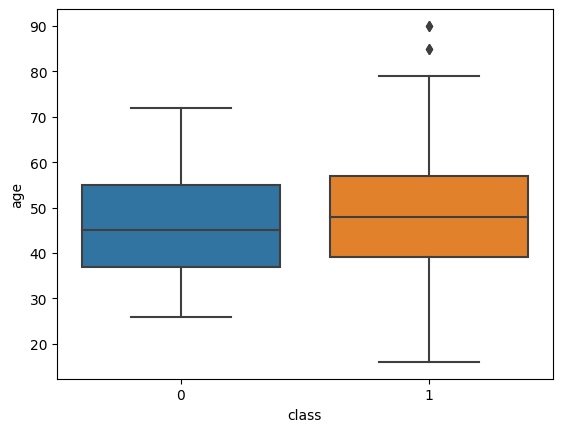

In [28]:
#box plot to explore age (discrete) vs class (categorical)
sns.boxplot(x=df['class'], y=df['age'])

Box plots don't seem to show a significant differece, as there is a lot of overlap, therefore statitical test will be done to confirm.

In [29]:
# mean and median calculations of those without diabtetes
no_diabetes = df[df['class'] ==0]
print ('Mean of those without diabetes:', no_diabetes['age'].mean())
print ('Median of those without diabetes :', no_diabetes['age'].median())

Mean of those without diabetes: 46.36
Median of those without diabetes : 45.0


In [30]:
# mean and median calculations of those with diabtetes
diabetes = df[df['class'] ==1]
print ('Mean of those with diabetes:', diabetes['age'].mean())
print ('Median of those with diabetes :', diabetes['age'].median())

Mean of those with diabetes: 49.071875
Median of those with diabetes : 48.0


The results show that there is no big difference between the means and medians of patients with and without diabetes.

#### Using qqplot to assess wheather there is normalization

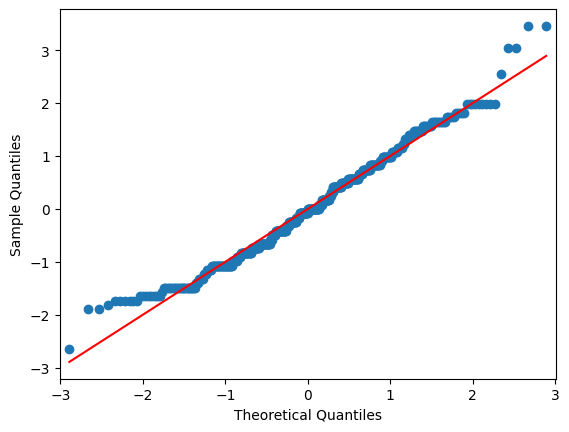

In [31]:
qqplot(df['age'], fit=True, line='s')
plt.show()

Most of the points on the plot fall on the line so conclusion is that age is normally distributed. We can then confirm a z test

In [32]:
#conduct z test of difference
ztest(diabetes['age'], no_diabetes['age'])

(2.4882300316303065, 0.012838066562901769)

With a P-Value of 0.013 which is <0.05, I will reject the null hypothesis and say there indeed a diffience between the ages of those 
who have diabetes and those who do not.

In [33]:
#correlation plot - see in a big picture how all the values are correlated with each other
df.corr()

,age,isfemale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
isfemale,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


For gender, if negative, it is female, if positive, male
1. Diabetes is positively correlated (0.449) with females, therefore females are 44.9% more likely to have diabetes than males.
2. Patients with polyuria are 66.6% more likely to have diabetes than those who do not have polyuria.
3. Patients with polydipsia are 64.9% more likely to have diabetes than  those who do not have polydipsia.
4. Patients who have sudden weightloss are 43.7% more likely to have diabetes.
5. Patients with partial paresis are 43.2% more likely to have diabetes.
6. Female patients are 32.8% less likely to have alopecia than male patients.

<Axes: >

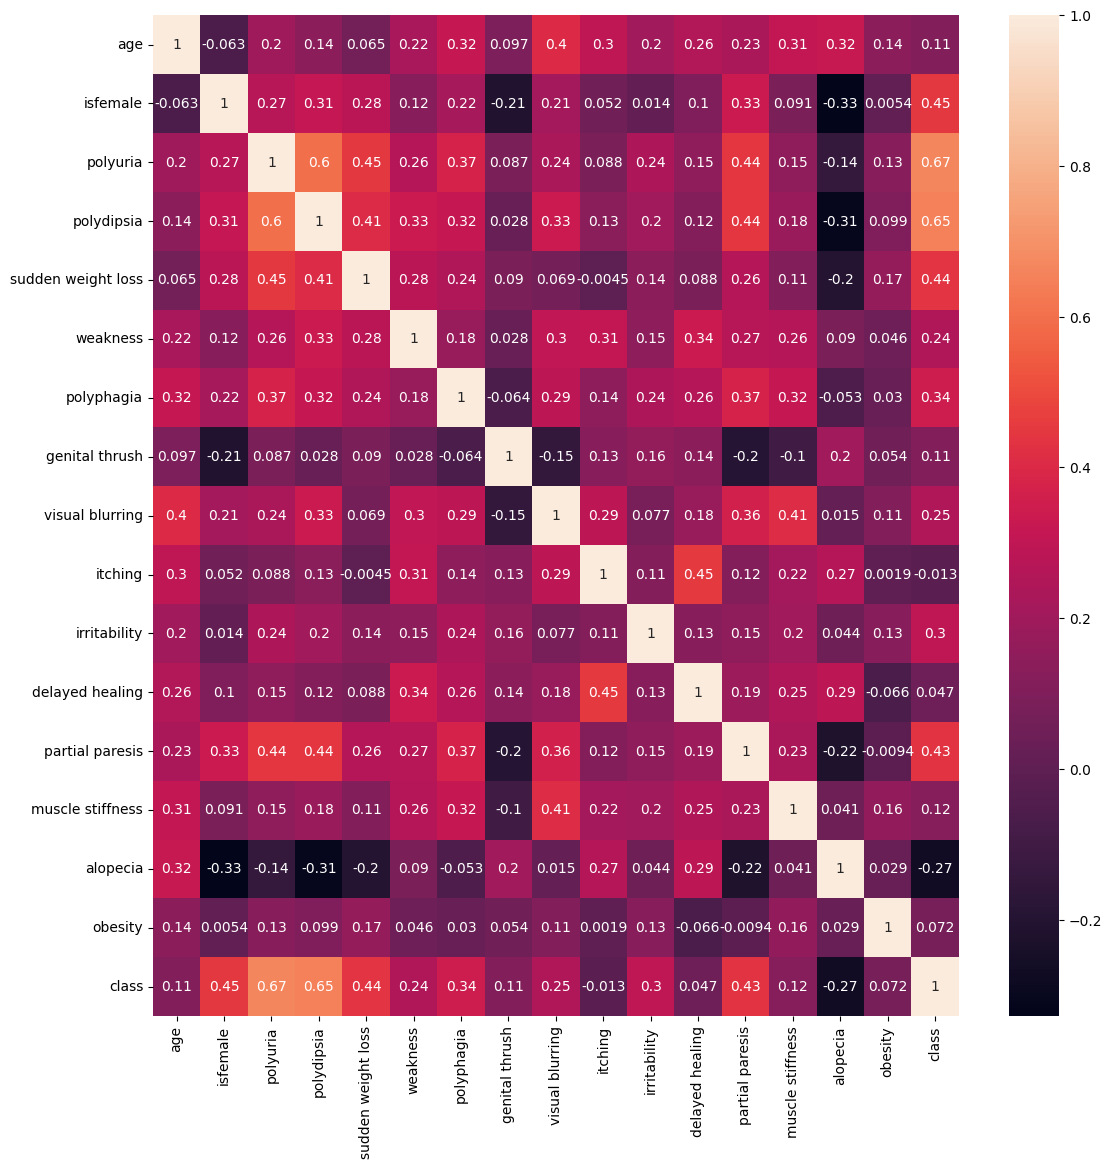

In [57]:
#heatmap for clearer vizualization of the correlation
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), annot=True)

#### Summary of data vizualization & statistics 
1. looked at the single colunms (univariate analysis)
2. looked at the relationship between two columns (bivariate analysis)
3. Conducted a statistical of difference between ages of non diabetic and diabetic patients
4. Plotted a correlation heatmap

## Part 3 -Training Machine Learning models to predict diabetes based on patients' symptoms. (Classification algorithm)

In [58]:
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier  # to establish a baseline
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#for model assessment
from sklearn.metrics import confusion_matrix, classification_report

#for vizualization
from matplotlib.pyplot import figure



In [59]:
#prepare independent and dependent variables
df=pd.read_csv("diabetes_data_clean.csv")

X=df.drop('class', axis =1)
y = df['class']
y.shape, X.shape

((520,), (520, 16))

In [60]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, stratify = y, random_state=0)
X_train.shape, y_train.shape

((416, 16), (416,))

In [38]:
# begin model training
#start with DummyClassifier to establish baseline
dummy = DummyClassifier(strategy="stratified", random_state=0)
dummy.fit (X_train, y_train)
dummy_predict = dummy.predict(X_test)

#### DummyClassifier model

In [39]:
#asses DummyClassifier model with confusion matrix
confusion_matrix(y_test, dummy_predict) 


array([[14, 26],
       [24, 40]], dtype=int64)

In [40]:
def plot_confusion_matrix(y_test, y_predict):
    "this function plots the confusion matrix"

    conf_matrix = confusion_matrix(y_test, y_predict)
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels', fontsize=16)
    ax.set_ylabel('True labels', fontsize=16)
    ax.set_title('Confusion Matrix', fontsize=16); 
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']) 
    plt.show() 

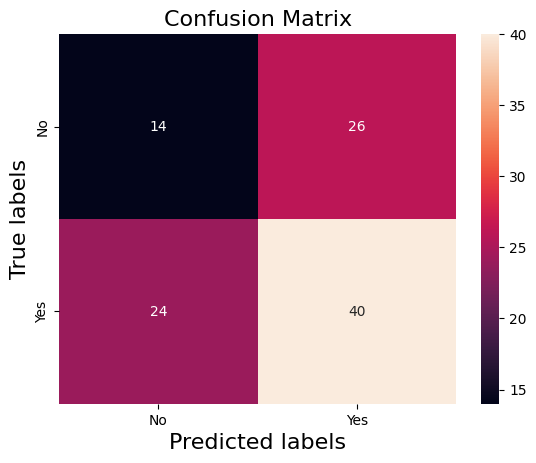

In [41]:
plot_confusion_matrix(y_test, dummy_predict)

* 26 False positive patients - patients do not have diabetes but are predicted to have - An issue because they would have to go through additional tests and anxiety.
* 24 False negative patients - patients have diabetes but were predicted not to have it- An issue because the disease is left undiagnozed and dangerous for patient's health.


In [42]:
#use a classification report to compare test data with prediction
print (classification_report (y_test, dummy_predict))

              precision    recall  f1-score   support

           0       0.37      0.35      0.36        40
           1       0.61      0.62      0.62        64

    accuracy                           0.52       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.51      0.52      0.52       104



Accuracy of the Dummy classification model is  is 52%, which is not high enough and therefore can try more models.

#### Logistic regression model

In [43]:
#Logistic regression
logr= LogisticRegression(max_iter=10000)  #use max_iter so as to not stop the iteration due limits
logr.fit(X_train, y_train)
logr_predict = logr.predict(X_test)

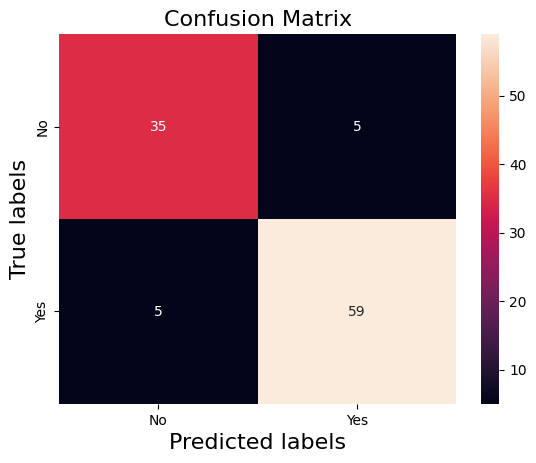

In [44]:
plot_confusion_matrix(y_test, logr_predict)

lower False positives (5) and False Negatives(5) in the logistic model

In [45]:
# logistic classification report
print (classification_report(y_test, logr_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.92      0.92      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



##### Accuracy score has gone up from 52% in dummy model to 90% in logistic model
##### precision, recall and f1-scores have all increased as well
This means that the logistic model a better model to predict diabetes than the dummy classifier model

#### Decision Tree model

In [46]:
# Decision Tree model
tree = DecisionTreeClassifier()
tree.fit (X_train, y_train)
tree_predict = tree.predict(X_test)

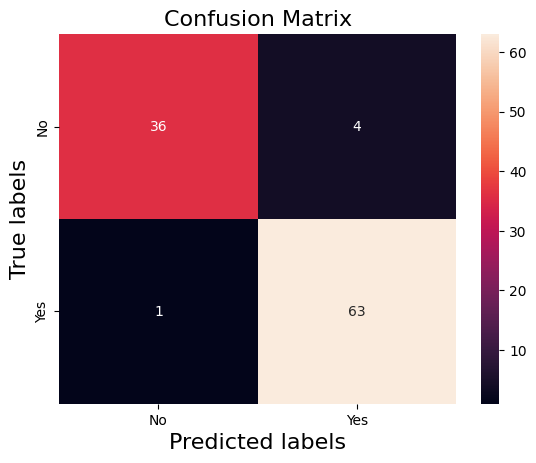

In [47]:
plot_confusion_matrix(y_test, tree_predict)

#### The Decision Tree model identified 4 False Positive and Zero False Negative Values

In [48]:
# Decision Tree classification report
print (classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.94      0.98      0.96        64

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



#### The Accuracy Score of the Decision Tree model is the highest at 95% compared to logistic regression model at 90%

#### Random Forest Model

In [49]:
# Random Forest
forest = RandomForestClassifier()
forest.fit (X_train, y_train)
forest_predict = forest.predict(X_test)

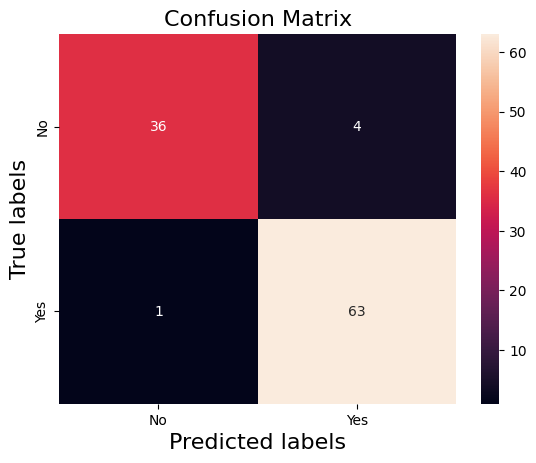

In [50]:
plot_confusion_matrix(y_test, forest_predict)

* The Random Forest model identified 1 False Negative and 4 False Positive cases.

In [51]:
# Random Forest classification report
print (classification_report(y_test, forest_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.94      0.98      0.96        64

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



#### * The Random Forest Classification model has an accuracy of 95%
#### * This is slighly lower compared to the Decision tree regression model accuracy of 96%

### The overall best model in this analysis is the Decision tree at 95% prediction accuracy.

In [54]:
#visalize feature importance from highest to lowest
pd.DataFrame ({'feature': X.columns, 
               'importance': tree.feature_importances_}).sort_values('importance', ascending =False)

,feature,importance
3,polydipsia,0.424208
1,isfemale,0.131796
2,polyuria,0.115480
14,alopecia,0.074900
0,age,0.066944
9,itching,0.049823
11,delayed healing,0.042698
6,polyphagia,0.033854
10,irritability,0.022087
7,genital thrush,0.016927


#### Top 5 important features to look up for obsesity based on the decision tree model are: 
1. Polydipsia
2. gender (Female)
3. Polyuria
4. age
5. alopecia


Summary of training ML models:
1. Trained a baseline model
2. Trained three different models - logistic regression, decision tree, random forest
3. Identified the important features in the best performing model

Conclusion:

The best machine learning model to predict whether a patient has diabetes or not is the Decision Tree model with the accurary of 96%. 